In [76]:
%config Completer.use_jedi = False

In [77]:
import pandas as pd

In [118]:
df = pd.read_csv('./datalab/USvideos/USvideos.csv', nrows=800)

In [119]:
df = df.drop(['thumbnail_link'], axis=1)

In [120]:
# df.views = df['views'].apply(lambda x : x/10000)

In [121]:
# df.views = df.views.astype(int)

In [122]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False


In [123]:
df.trending_date = df.trending_date.apply(lambda x : '20'+x[3:5])

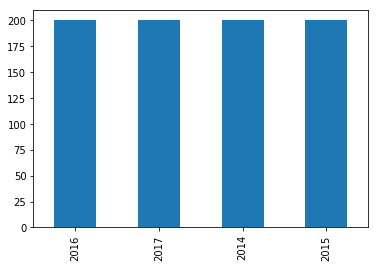

In [130]:
df.trending_date.value_counts().plot.bar()

In [131]:
# plt.figure(figsize=(20,10))
# plt.xlabel ="Years"
# plt.ylabel = "Video Counts"
# plt.title = "No. of videos uploaded By Years"
# sns.barplot(x= df.trending_date ,y=df.trending_date.value_counts(), data= df)

In [107]:
print("Max Views: ",df.views.max())
print("Min Views:",df.views.min())

Max Views:  43449654
Min Views: 687


In [150]:
print(f"Views Less than 1M:  ",df[df.views < 1e6]['views'].count()/df.views.count()*100 )
print("Views Less than 5M:  ",df[df.views < 5e6]['views'].count()/df.views.count()*100 )
print("Views Less than 10M: ",df[df.views < 10e6]['views'].count()/df.views.count()*100 )

Views Less than 1M:   78.375
Views Less than 5M:   96.875
Views Less than 10M:  98.75


In [173]:
most_view_channel = df.groupby('channel_title')['views'].sum()[:5].reset_index()

In [174]:
most_view_channel = most_view_channel.sort_values('views', ascending=False)

## Most Viewed Channel

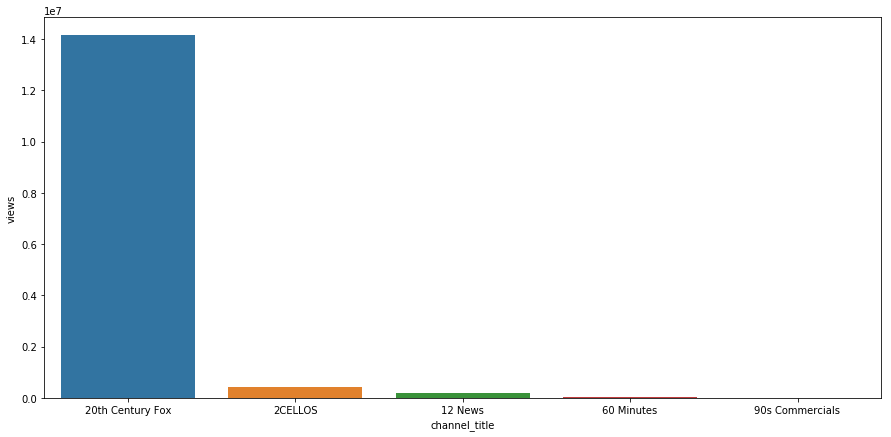

In [176]:
plt.figure(figsize=(15,7))
sns.barplot(x='channel_title', y = 'views', data= most_view_channel)

In [196]:
max_views_category = df.groupby(df.category_id)['views'].max()[:10].reset_index()

In [197]:
max_views_category.views = max_views_category.views.apply(lambda x : int(x/100000))

In [206]:
max_views_category  = max_views_category.sort_values('views', ascending= True)

In [207]:
max_views_category.head(10)

,index,category_id,views
0,3,15,4
1,6,20,4
2,1,2,9
3,5,19,10
4,7,22,30
5,4,17,35
6,8,23,47
7,9,24,53
8,0,1,66
9,2,10,434


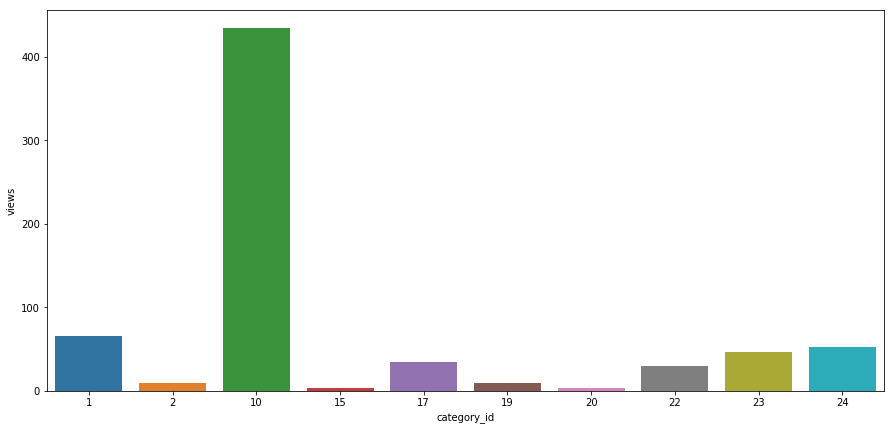

In [215]:
plt.figure(figsize=(15,7))
plt.title = 'Most View Category by 1M' 
sns.barplot(x='category_id', y = 'views', data= max_views_category.reset_index())

In [216]:
df.video_error_or_removed.value_counts()

False    800
Name: video_error_or_removed, dtype: int64